In [ ]:
!nvidia-smi

Wed Nov 27 20:48:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install -q \
ultralytics \
supervision \
roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00


In [ ]:
%cd {HOME}
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr" -O market-square.mp4 && rm -rf /tmp/cookies.txt

/content
--2024-11-27 20:49:04--  https://docs.google.com/uc?export=download&confirm=&id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr
Resolving docs.google.com (docs.google.com)... 173.194.79.101, 173.194.79.139, 173.194.79.138, ...
Connecting to docs.google.com (docs.google.com)|173.194.79.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr&export=download [following]
--2024-11-27 20:49:04--  https://drive.usercontent.google.com/download?id=1vVrEVMxucHgqGd7vAa501ASojbeGPhIr&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.127.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21302928 (20M) [video/mp4]
Saving to: ‘market-square.mp4’

market-square.mp4   100%[===================>]  20.32M  45.6M

In [ ]:
import cv2
from ultralytics import YOLO
import supervision as sv

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
VIDEO_PATH=f"{HOME}/market-square.mp4"

In [ ]:
# extract video frame (get image from the video)
generator = sv.get_video_frames_generator(VIDEO_PATH)
iterator = iter(generator)
frame = next(iterator)
sv.plot_image(frame,(16,16))

In [ ]:
model = YOLO("yolov8m.pt")

In [ ]:
results = model(frame, imgsz=2304, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)
detections = detections[detections.class_id == 0]

print(len(detections))

labels = [
    f"{results.names[class_id]}: {confidence:.2f}"
    for class_id, confidence in zip(detections.class_id, detections.confidence)
]

# Correct usage of BoxAnnotator
box_annotators = sv.BoxAnnotator(
    thickness=4,
    color=sv.Color.from_hex("#FFA500")
)

# Annotate without labels
frame = box_annotators.annotate(scene=frame, detections=detections)

# Add labels manually (optional)
for detection, label in zip(detections.xyxy, labels):
    x1, y1, x2, y2 = map(int, detection)
    cv2.putText(
        frame,
        label,
        (x1, y1 - 10),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.5,
        color=(255, 165, 0),
        thickness=2
    )

# Plot the annotated frame
sv.plot_image(frame, (16, 16))



draw polygon
Using this tool from Roboflow

In [ ]:
!pip install supervision --upgrade

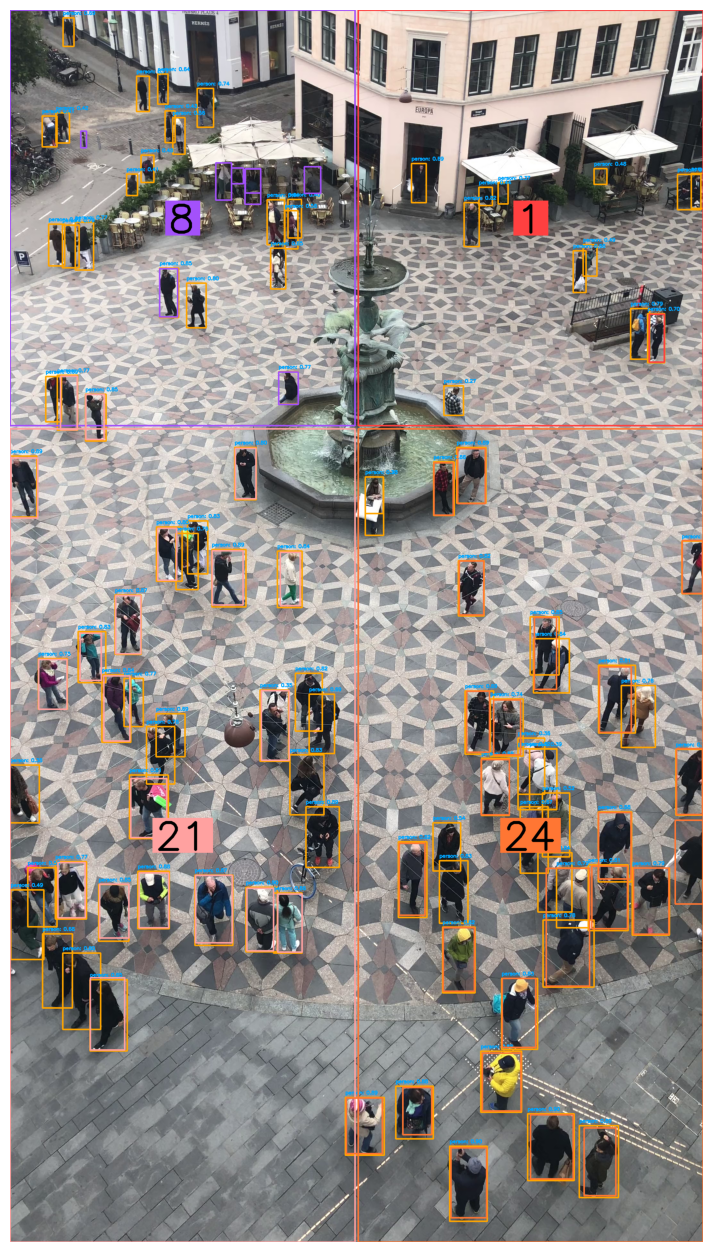

In [ ]:
import numpy as np
colors = sv.ColorPalette.DEFAULT


# Initialization of polygons
polygons = [
    np.array([
        [0, 0],
        [1080 - 5, 0],
        [1080 - 5, 1300 - 5],
        [0, 1300 - 5]
    ], np.int32),
    np.array([
        [1080 + 5, 0],
        [2160, 0],
        [2160, 1300 - 5],
        [1080 + 5, 1300 - 5]
    ], np.int32),
    np.array([
        [0, 1300 + 5],
        [1080 - 5, 1300 + 5],
        [1080 - 5, 3840],
        [0, 3840]
    ], np.int32),
    np.array([
        [1080 + 5, 1300 + 5],
        [2160, 1300 + 5],
        [2160, 3840],
        [1080 + 5, 3840]
    ], np.int32)
]

# Initialization of PolygonZone without unsupported parameter
zones = [
    sv.PolygonZone(
        polygon=polygon
    )
    for polygon in polygons
]

# Zone annotators
zone_annotators = [
    sv.PolygonZoneAnnotator(
        zone=zone,
        color=colors.by_idx(index),
        thickness=4,
        text_thickness=8,
        text_scale=4
    )
    for index, zone in enumerate(zones)
]

# Box annotators
box_annotators = [
    sv.BoxAnnotator(
        color=colors.by_idx(index),
        thickness=4
    )
    for index in range(len(polygons))
]

# Run model and filter detections
results = model(frame, imgsz=1280, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)
detections = detections[detections.class_id == 0]

labels = [
    results.names[class_id]
    for class_id in detections.class_id
]

# Annotate zones and boxes
for zone, zone_annotator, box_annotator in zip(zones, zone_annotators, box_annotators):
    mask = zone.trigger(detections=detections)
    detections_filtered = detections[mask]
    frame = box_annotator.annotate(scene=frame, detections=detections_filtered)
    frame = zone_annotator.annotate(scene=frame)

# Plot the result
sv.plot_image(frame, (16, 16))



In [ ]:
def process_frame(frame, index):
    results = model(frame, imgsz=1280, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = detections[detections.class_id == 0]

    for zone, zone_annotator, box_annotator in zip(zones, zone_annotators, box_annotators):
        mask = zone.trigger(detections=detections)
        detections_filtered = detections[mask]
        frame = box_annotator.annotate(scene=frame, detections=detections_filtered)
        frame = zone_annotator.annotate(scene=frame)

    return frame  # Return the processed frame



In [ ]:
sv.process_video(source_path=VIDEO_PATH, target_path="result.mp4", callback=process_frame)
